## Steps to perform:
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:
	
### 1.     Feature Transformation

●	Transform categorical values into numerical values (discrete)


In [4]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("loan_data.csv")  # update filename as needed

# Step 3: Check for basic info and null values
print("Initial shape of data:", df.shape)
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Step 4: Drop duplicate rows (if any)
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# Step 5: Handle missing values (if any)
# If there were missing values, here’s how to fill or drop them.
# Example: fill missing numerical values with median
# df['column_name'] = df['column_name'].fillna(df['column_name'].median())

# But since our data has no missing values, we skip this step.

# Step 6: Convert categorical variable 'purpose' using one-hot encoding
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Step 7: Final check after preprocessing
print("\nFinal shape after preprocessing:", df.shape)
print("\nSample rows after encoding:\n", df.head())


Initial shape of data: (9578, 14)

Missing values in each column:
 credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Data types:
 credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Shape after removing duplicates: (9578, 14)

Final shape after preprocessing: (9578, 19)

Sample rows after encoding:
    credit.policy  int.rate  installment  log

### 2.     Exploratory data analysis of different factors in the dataset.

Summary statistics:
        credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.01441

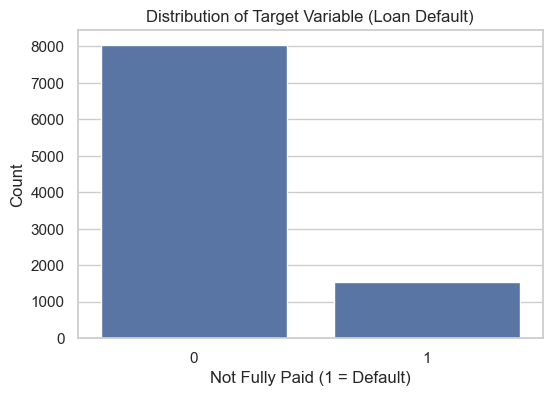

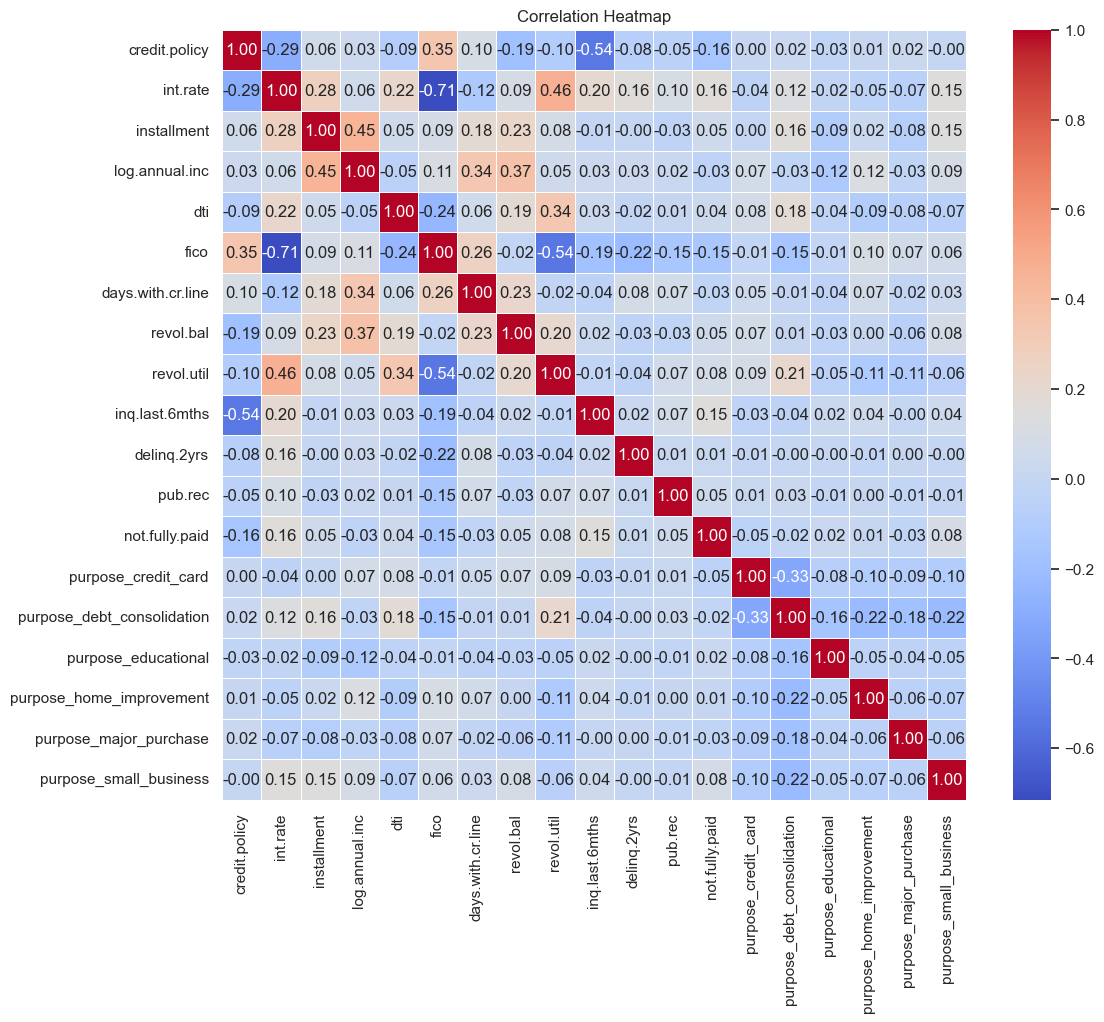

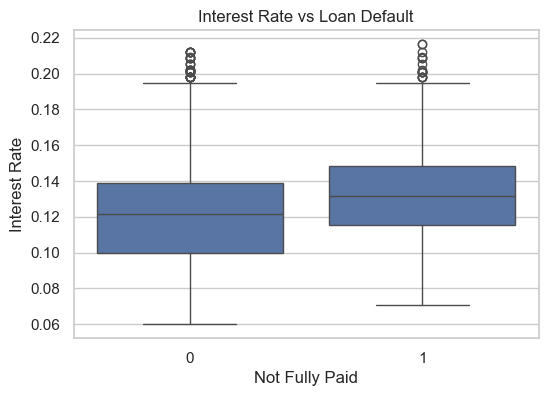

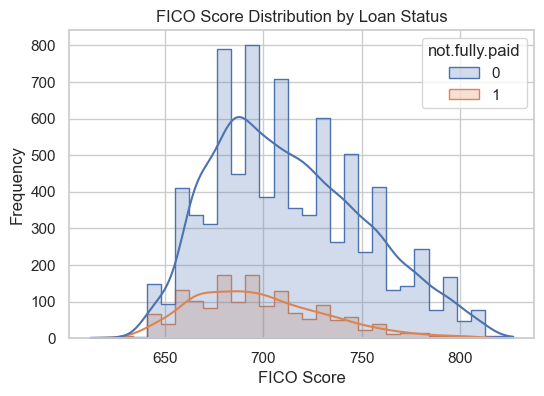

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (already preprocessed with one-hot encoding)
#df = pd.read_csv("loan_data_cleaned.csv")  # or use the cleaned DataFrame directly if in memory

# Set visual style
sns.set(style="whitegrid")

# Step 2: Summary statistics
print("Summary statistics:\n", df.describe())

# Step 3: Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='not.fully.paid')
plt.title('Distribution of Target Variable (Loan Default)')
plt.xlabel('Not Fully Paid (1 = Default)')
plt.ylabel('Count')
plt.show()

# Step 4: Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Boxplot of interest rate vs. loan default
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='not.fully.paid', y='int.rate')
plt.title('Interest Rate vs Loan Default')
plt.xlabel('Not Fully Paid')
plt.ylabel('Interest Rate')
plt.show()

# Step 6: FICO score distribution by default status
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='fico', hue='not.fully.paid', bins=30, kde=True, element='step')
plt.title('FICO Score Distribution by Loan Status')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()

# Step 7: Count of loan purposes (if original column is still available)
# If you haven't dropped the original 'purpose' column:
# plt.figure(figsize=(10, 5))
# sns.countplot(data=df_original, x='purpose', order=df_original['purpose'].value_counts().index, hue='not.fully.paid')
# plt.title('Loan Purpose vs Default Status')
# plt.xticks(rotation=45)
# plt.show()


🔍 Exploratory Data Analysis (EDA) – Conclusion

The exploratory analysis of the Lending Club loan dataset revealed several key insights:


Imbalanced Target Variable:

- The target variable not.fully.paid is imbalanced, with a significantly higher number of fully paid loans compared to defaulted ones. This class imbalance must be considered during model training and evaluation to avoid biased predictions.

Interest Rate and Default Risk:

- Borrowers who defaulted tend to have higher interest rates, indicating that Lending Club's internal risk assessment (which drives interest rate assignment) partially aligns with default risk.

FICO Score Trends:

- The FICO score distribution shows a clear separation between defaulters and non-defaulters. Defaulted loans are associated with lower FICO scores, reinforcing its predictive value.

Correlated Features:

- The correlation heatmap identified some moderate correlations between variables, such as installment and loan amount (not directly present), and between int.rate and fico. However, no extremely high correlations (above 0.85) were found that would necessitate immediate removal, though further investigation is warranted.

Categorical Feature Behavior (Purpose):

- When visualized (if kept before one-hot encoding), certain loan purposes such as “small_business” and “educational” appeared to have a relatively higher rate of default compared to others, indicating potential risk factors linked to loan intent.

📌 Recommendation:

Due to the class imbalance and the presence of meaningful patterns in features like FICO score, interest rate, and loan purpose, appropriate techniques like SMOTE (Synthetic Minority Oversampling Technique) and feature scaling should be considered in the modeling phase.

### 3.     Additional Feature Engineering

- Calculating the correlation matrix
- Identifying and dropping highly correlated features (e.g., correlation > 0.85)
- Finalizing the reduced feature set


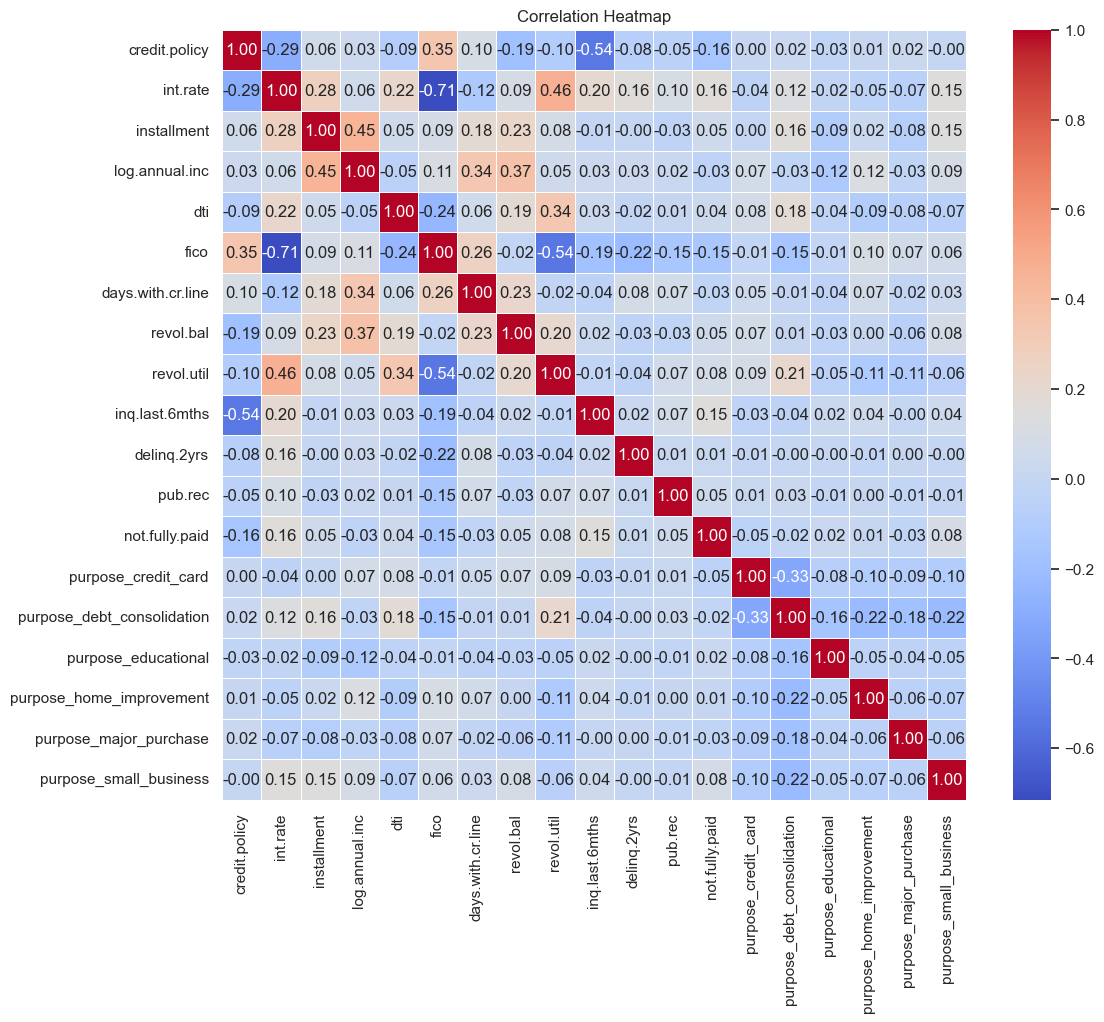

Highly correlated pairs (>|0.85|):

Dropping columns: set()

Final shape after dropping correlated features: (9578, 19)
Remaining columns:
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')


In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data (if not already in memory)
#df = pd.read_csv("loan_data_cleaned.csv")

# Step 2: Compute the correlation matrix
corr_matrix = df.corr()

# Step 3: Plot heatmap for visual inspection
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Identify pairs with high correlation (e.g., > 0.85)
def get_highly_correlated(corr_matrix, threshold=0.85):
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                correlated_pairs.append((col1, col2, corr_matrix.iloc[i, j]))
    return correlated_pairs

high_corr = get_highly_correlated(corr_matrix, threshold=0.85)
print("Highly correlated pairs (>|0.85|):")
for col1, col2, corr in high_corr:
    print(f"{col1} ⟷ {col2}: correlation = {corr:.2f}")

# Step 5: Drop one of each highly correlated pair
# Example: if 'installment' is highly correlated with 'fico', drop 'installment'
cols_to_drop = set()
for col1, col2, _ in high_corr:
    cols_to_drop.add(col2)  # arbitrarily drop the second column in each pair

print("\nDropping columns:", cols_to_drop)
df_reduced = df.drop(columns=cols_to_drop)

# Step 6: Final dataset check
print("\nFinal shape after dropping correlated features:", df_reduced.shape)
print("Remaining columns:\n", df_reduced.columns)


## .     Modeling

●	After applying EDA and feature engineering, you are now ready to build the predictive models.
●	In this part, you will create a deep learning model using Keras with Tensorflow backend.
Write a python code for this. whihc deep learning mode do you suggest and why?


Now adding SMOT method to see the results again 

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.6697 - auc: 0.6738 - loss: 0.6139 - val_accuracy: 0.6408 - val_auc: 0.0000e+00 - val_loss: 0.6132
Epoch 2/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7297 - auc: 0.7593 - loss: 0.5499 - val_accuracy: 0.6517 - val_auc: 0.0000e+00 - val_loss: 0.5673
Epoch 3/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7478 - auc: 0.7881 - loss: 0.5134 - val_accuracy: 0.6474 - val_auc: 0.0000e+00 - val_loss: 0.5452
Epoch 4/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7572 - auc: 0.8000 - loss: 0.4951 - val_accuracy: 0.6326 - val_auc: 0.0000e+00 - val_loss: 0.5511
Epoch 5/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7446 - auc: 0.7926 - loss: 0.5043 - val_accuracy: 0.6369 - val_auc: 0.0000e+00 - val_loss: 0.5371
Epoch 6/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7579 - auc: 0.8024 - loss: 0.4962 - val_accuracy: 0.6186 - val_auc: 0.0000e+00 - val_loss: 0.5341
Epoch 7/50
322/

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.7960 - auc: 0.6236 - loss: 0.4905

Test Loss: 0.4859, Accuracy: 0.8006, AUC: 0.6530
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      1609
           1       0.30      0.18      0.22       307

    accuracy                           0.80      1916
   macro avg       0.58      0.55      0.55      1916
weighted avg       0.77      0.80      0.78      1916

Confusion Matrix:
 [[1479  130]
 [ 252   55]]


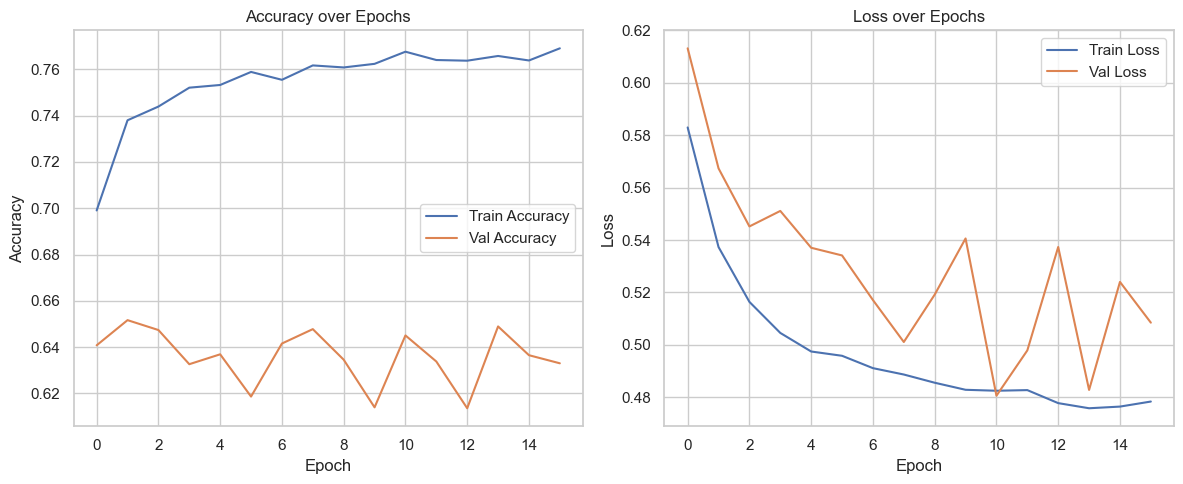

In [12]:
# Step 1: Imports

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.metrics import AUC

# Step 2: Load dataset
#df = pd.read_csv("loan_data_final.csv")  # update filename if needed

# Step 3: Separate features and target
X = df.drop("not.fully.paid", axis=1)
y = df["not.fully.paid"]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # binary classification
])

# Step 8: Compile the model with AUC as a metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])

# Step 9: Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 10: Train the model
history = model.fit(X_train_scaled, y_train_resampled,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Step 11: Save the model
model.save("loan_default_model.h5")

# Step 12: Evaluate the model
loss, accuracy, auc_score = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")

# Step 13: Generate classification report
y_pred_probs = model.predict(X_test_scaled).ravel()
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

# Step 14: Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
